In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
from sklearn.model_selection import train_test_split


In [7]:
# Importing csv file into dataframe

flights = pd.read_csv("./DataSets/Test_Flight_Data.csv")

flights.head()


,Airline,Departure,Destination,Departure_date,Arrival_date,Ticket_Price(Dollars),Stops,Travel_Time
0,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1178.0,2,31
1,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-03,1218.0,2,42
2,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-04,667.0,2,23
3,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1064.0,1,28
4,Air India,Kathmandu,Chicago,2023-10-01,2023-10-02,1476.0,2,41


In [8]:
flights

,Airline,Departure,Destination,Departure_date,Arrival_date,Ticket_Price(Dollars),Stops,Travel_Time
0,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1178.0,2,31
1,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-03,1218.0,2,42
2,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-04,667.0,2,23
3,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1064.0,1,28
4,Air India,Kathmandu,Chicago,2023-10-01,2023-10-02,1476.0,2,41
...,...,...,...,...,...,...,...,...
26587,Etihad,New York,Singapore,2024-01-17,2024-01-18,990.0,1,33
26588,Emirates,New York,Singapore,2024-01-17,2024-01-19,1400.0,1,35
26589,Korean Air,New York,Singapore,2024-01-17,2024-01-18,1972.0,1,29
26590,United Airlines,New York,Singapore,2024-01-17,2024-01-18,700.0,2,28


In [9]:
flights["Airline"].value_counts()

Airline
Qatar Airways                      3198
Air India                          3074
China Southern                     1809
Cathay Pacific                     1674
Lufthansa                          1641
Turkish Airlines                   1535
Emirates                           1256
SWISS                              1002
Korean Air                          983
American Airlines                   849
Qantas                              776
British Airways                     641
IndiGo                              594
Air France                          563
United Airlines                     527
Singapore Airlines                  495
China Eastern                       484
Easy Jet                            427
Nepal Airlines                      406
THAI                                397
flydubai                            389
Malaysia Airlines                   379
Etihad                              308
Turkish Airways                     283
Austrian                        

Here we check the number of airlines and see that the data has few errors so we clean it.

In [10]:
# Dropping row with specific string name

malfunction = ['Malaysia AirlinesEtihad Airways','Turkish AirlinesLufthansa']

flights_flitered = flights.drop(flights[flights['Airline'].isin(malfunction)].index)

In [11]:
flights_flitered["Airline"].value_counts()

Airline
Qatar Airways         3198
Air India             3074
China Southern        1809
Cathay Pacific        1674
Lufthansa             1641
Turkish Airlines      1535
Emirates              1256
SWISS                 1002
Korean Air             983
American Airlines      849
Qantas                 776
British Airways        641
IndiGo                 594
Air France             563
United Airlines        527
Singapore Airlines     495
China Eastern          484
Easy Jet               427
Nepal Airlines         406
THAI                   397
flydubai               389
Malaysia Airlines      379
Etihad                 308
Turkish Airways        283
Austrian               259
Air China              257
Delta                  245
Delta Airline          228
Turkish Airline        216
Brusseis               215
Air Arabia             209
Air Canada             206
Virgin Atlantic        203
Vueling                199
Luxiar                 160
THAI Airways           143
Malindo Air         

In [12]:
def convert_airline(airline):
    if airline in ["Delta Airlines", "Delta Airline"]:
        return "Delta"
    
    elif airline in ["Etihad Airways"]:
        return "Etihad"
    
    elif airline in ["THAI Airways"]:
        return "THAI"
    
    elif airline in ["Turkish Airways", "Turkish Airline"]:
        return "Turkish Airlines"
        
    else:
        return airline

In [13]:
flights_flitered["Airline"] = flights_flitered["Airline"].apply(convert_airline)

In [14]:
flights_flitered["Airline"].value_counts().sort_values(ascending = False)


Airline
Qatar Airways         3198
Air India             3074
Turkish Airlines      2034
China Southern        1809
Cathay Pacific        1674
Lufthansa             1641
Emirates              1256
SWISS                 1002
Korean Air             983
American Airlines      849
Qantas                 776
British Airways        641
IndiGo                 594
Air France             563
THAI                   540
United Airlines        527
Singapore Airlines     495
China Eastern          484
Delta                  478
Easy Jet               427
Nepal Airlines         406
flydubai               389
Malaysia Airlines      379
Etihad                 328
Austrian               259
Air China              257
Brusseis               215
Air Arabia             209
Air Canada             206
Virgin Atlantic        203
Vueling                199
Luxiar                 160
Malindo Air            125
SriLankan Airlines     116
Name: count, dtype: int64

In [15]:
# fig, ax = plt.subplots(figsize=(10, 5))

# sns.barplot(x="Ticket_Price(Dollars)", y="Airline", errorbar=None, data=flights_flitered)
# plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_8880\3644351974.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="Airline", data=flights_flitered, width=0.7, dodge=False, palette='Set2')


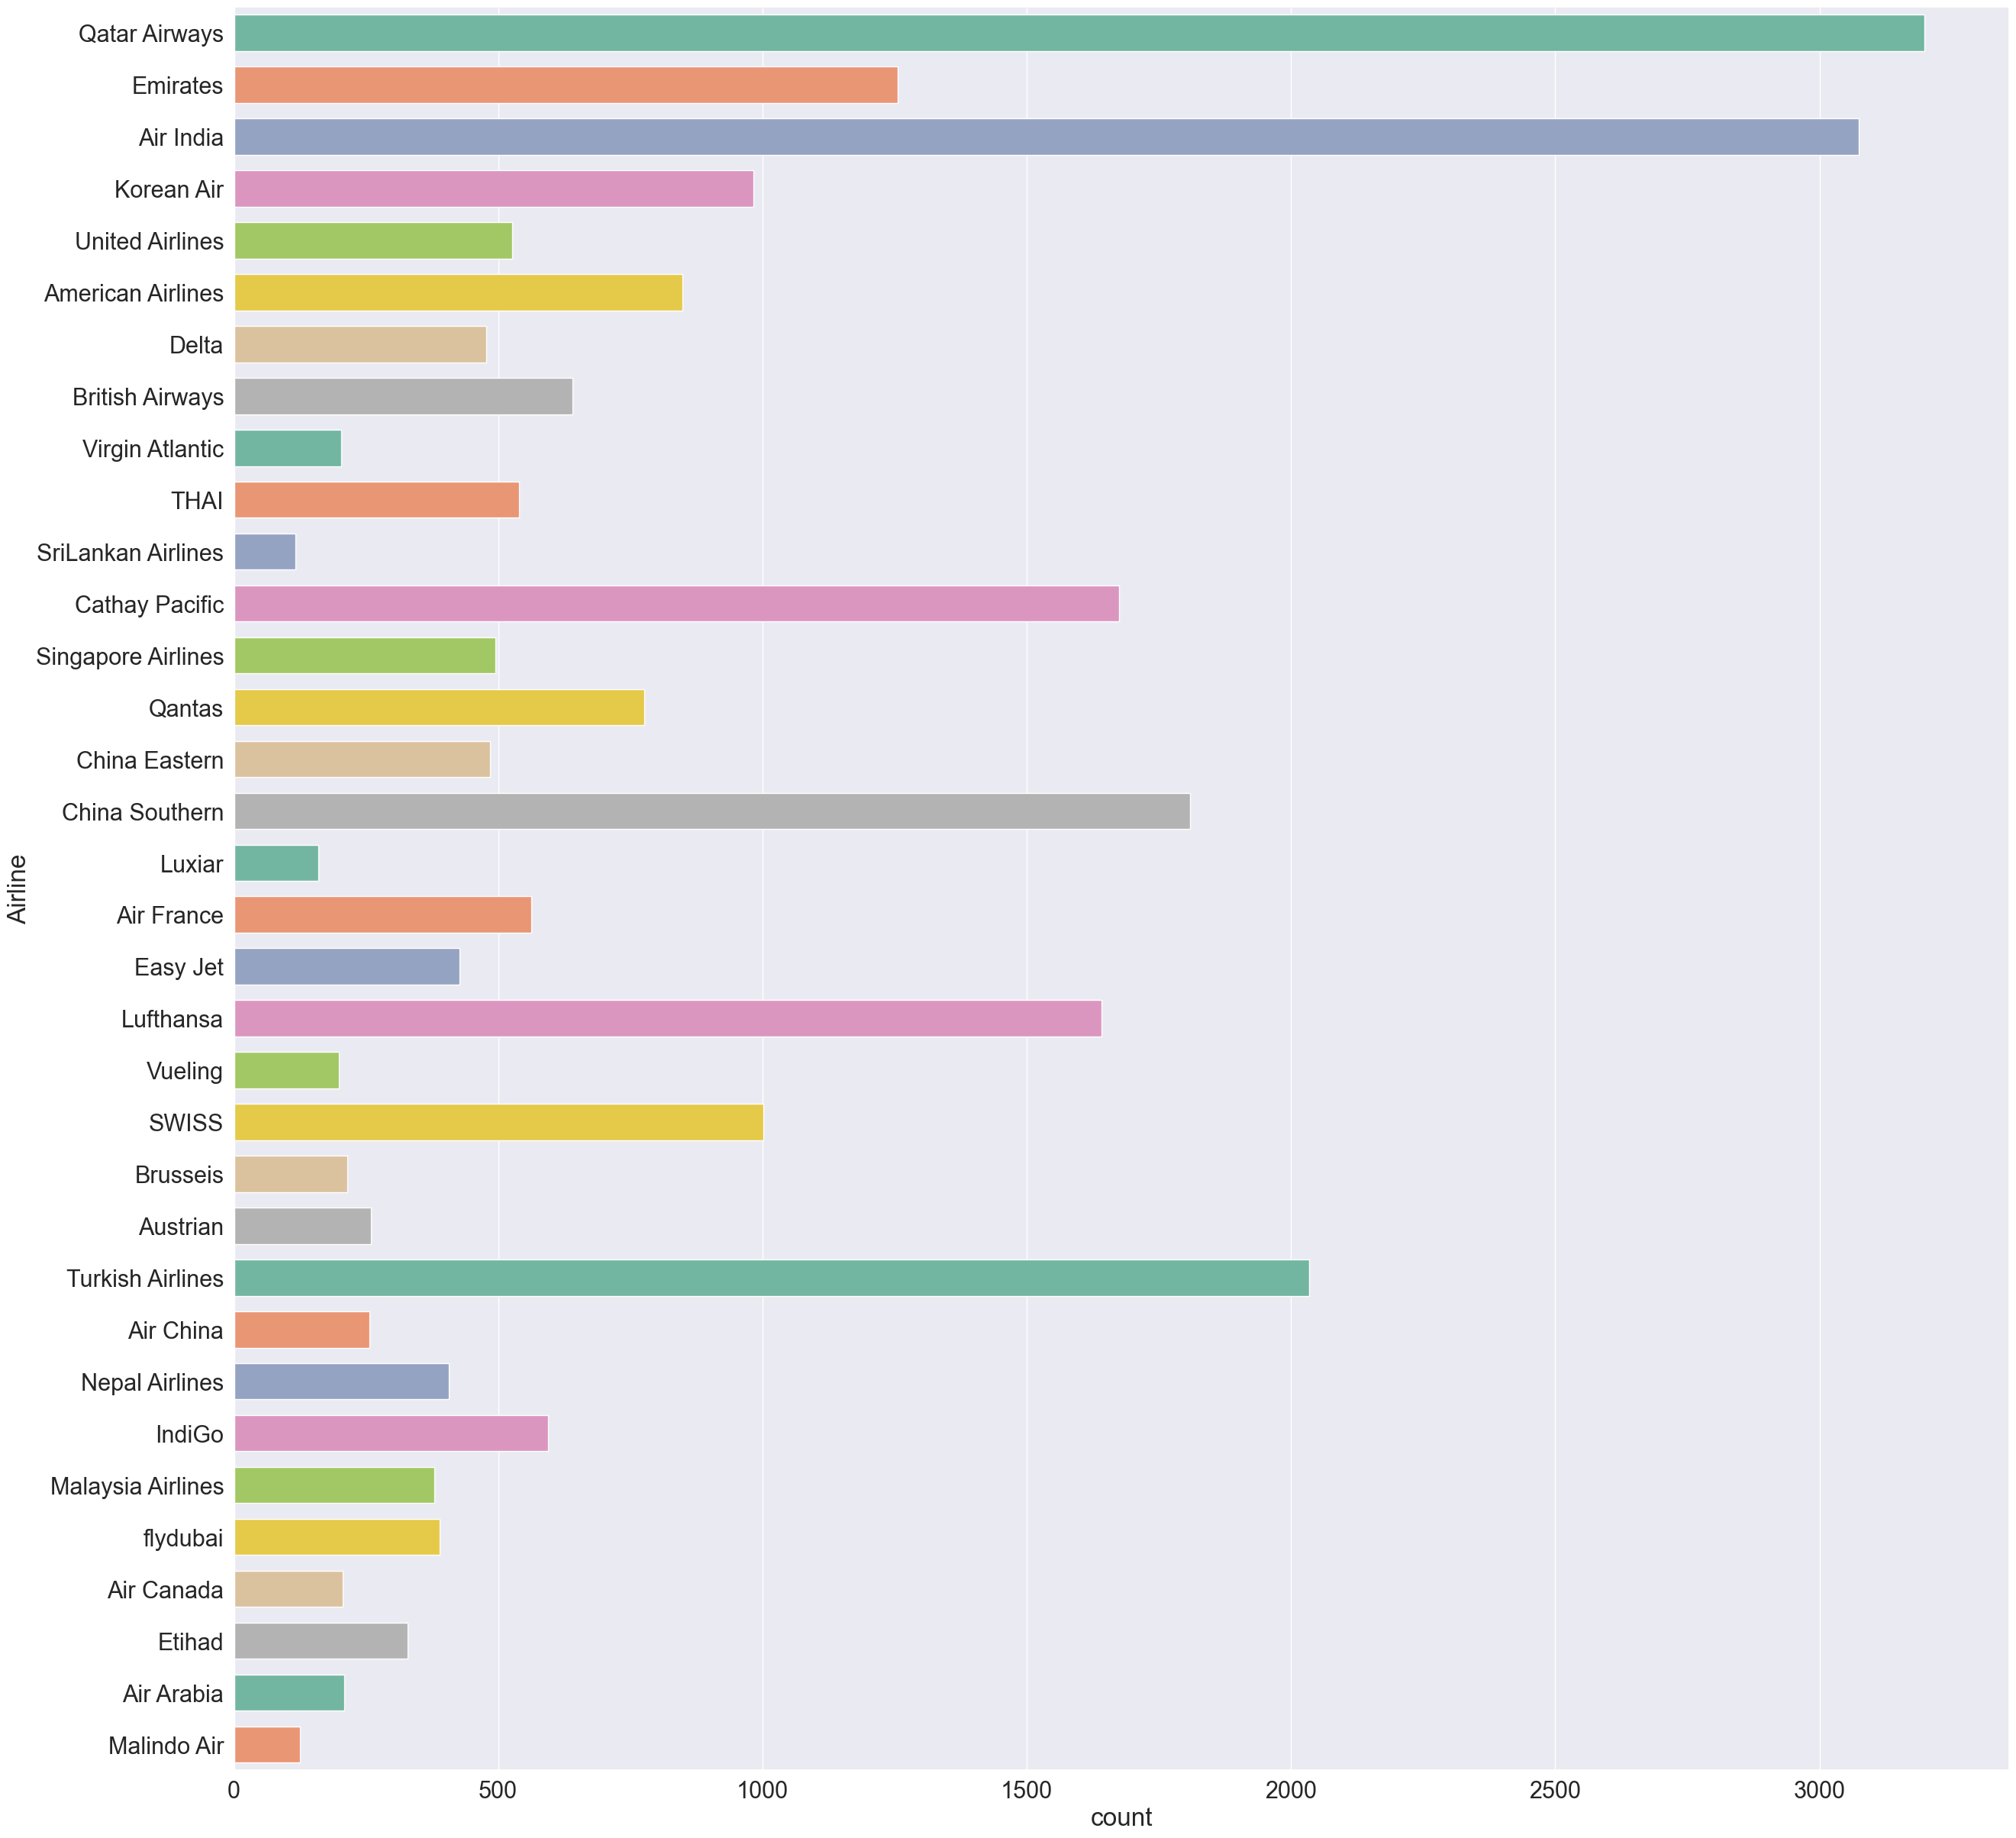

<Figure size 3000x3000 with 0 Axes>

In [78]:
ax = plt.figure(figsize=(30,30))
sns.set(font_scale = 2)
ax = sns.countplot(y="Airline", data=flights_flitered, width=0.7, dodge=False, palette='Set2')
plt.figure(figsize=(30, 30))
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_8880\2313878387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Airline",y="Ticket_Price(Dollars)", data=flights_flitered, width=0.5, dodge=False, palette='cool')


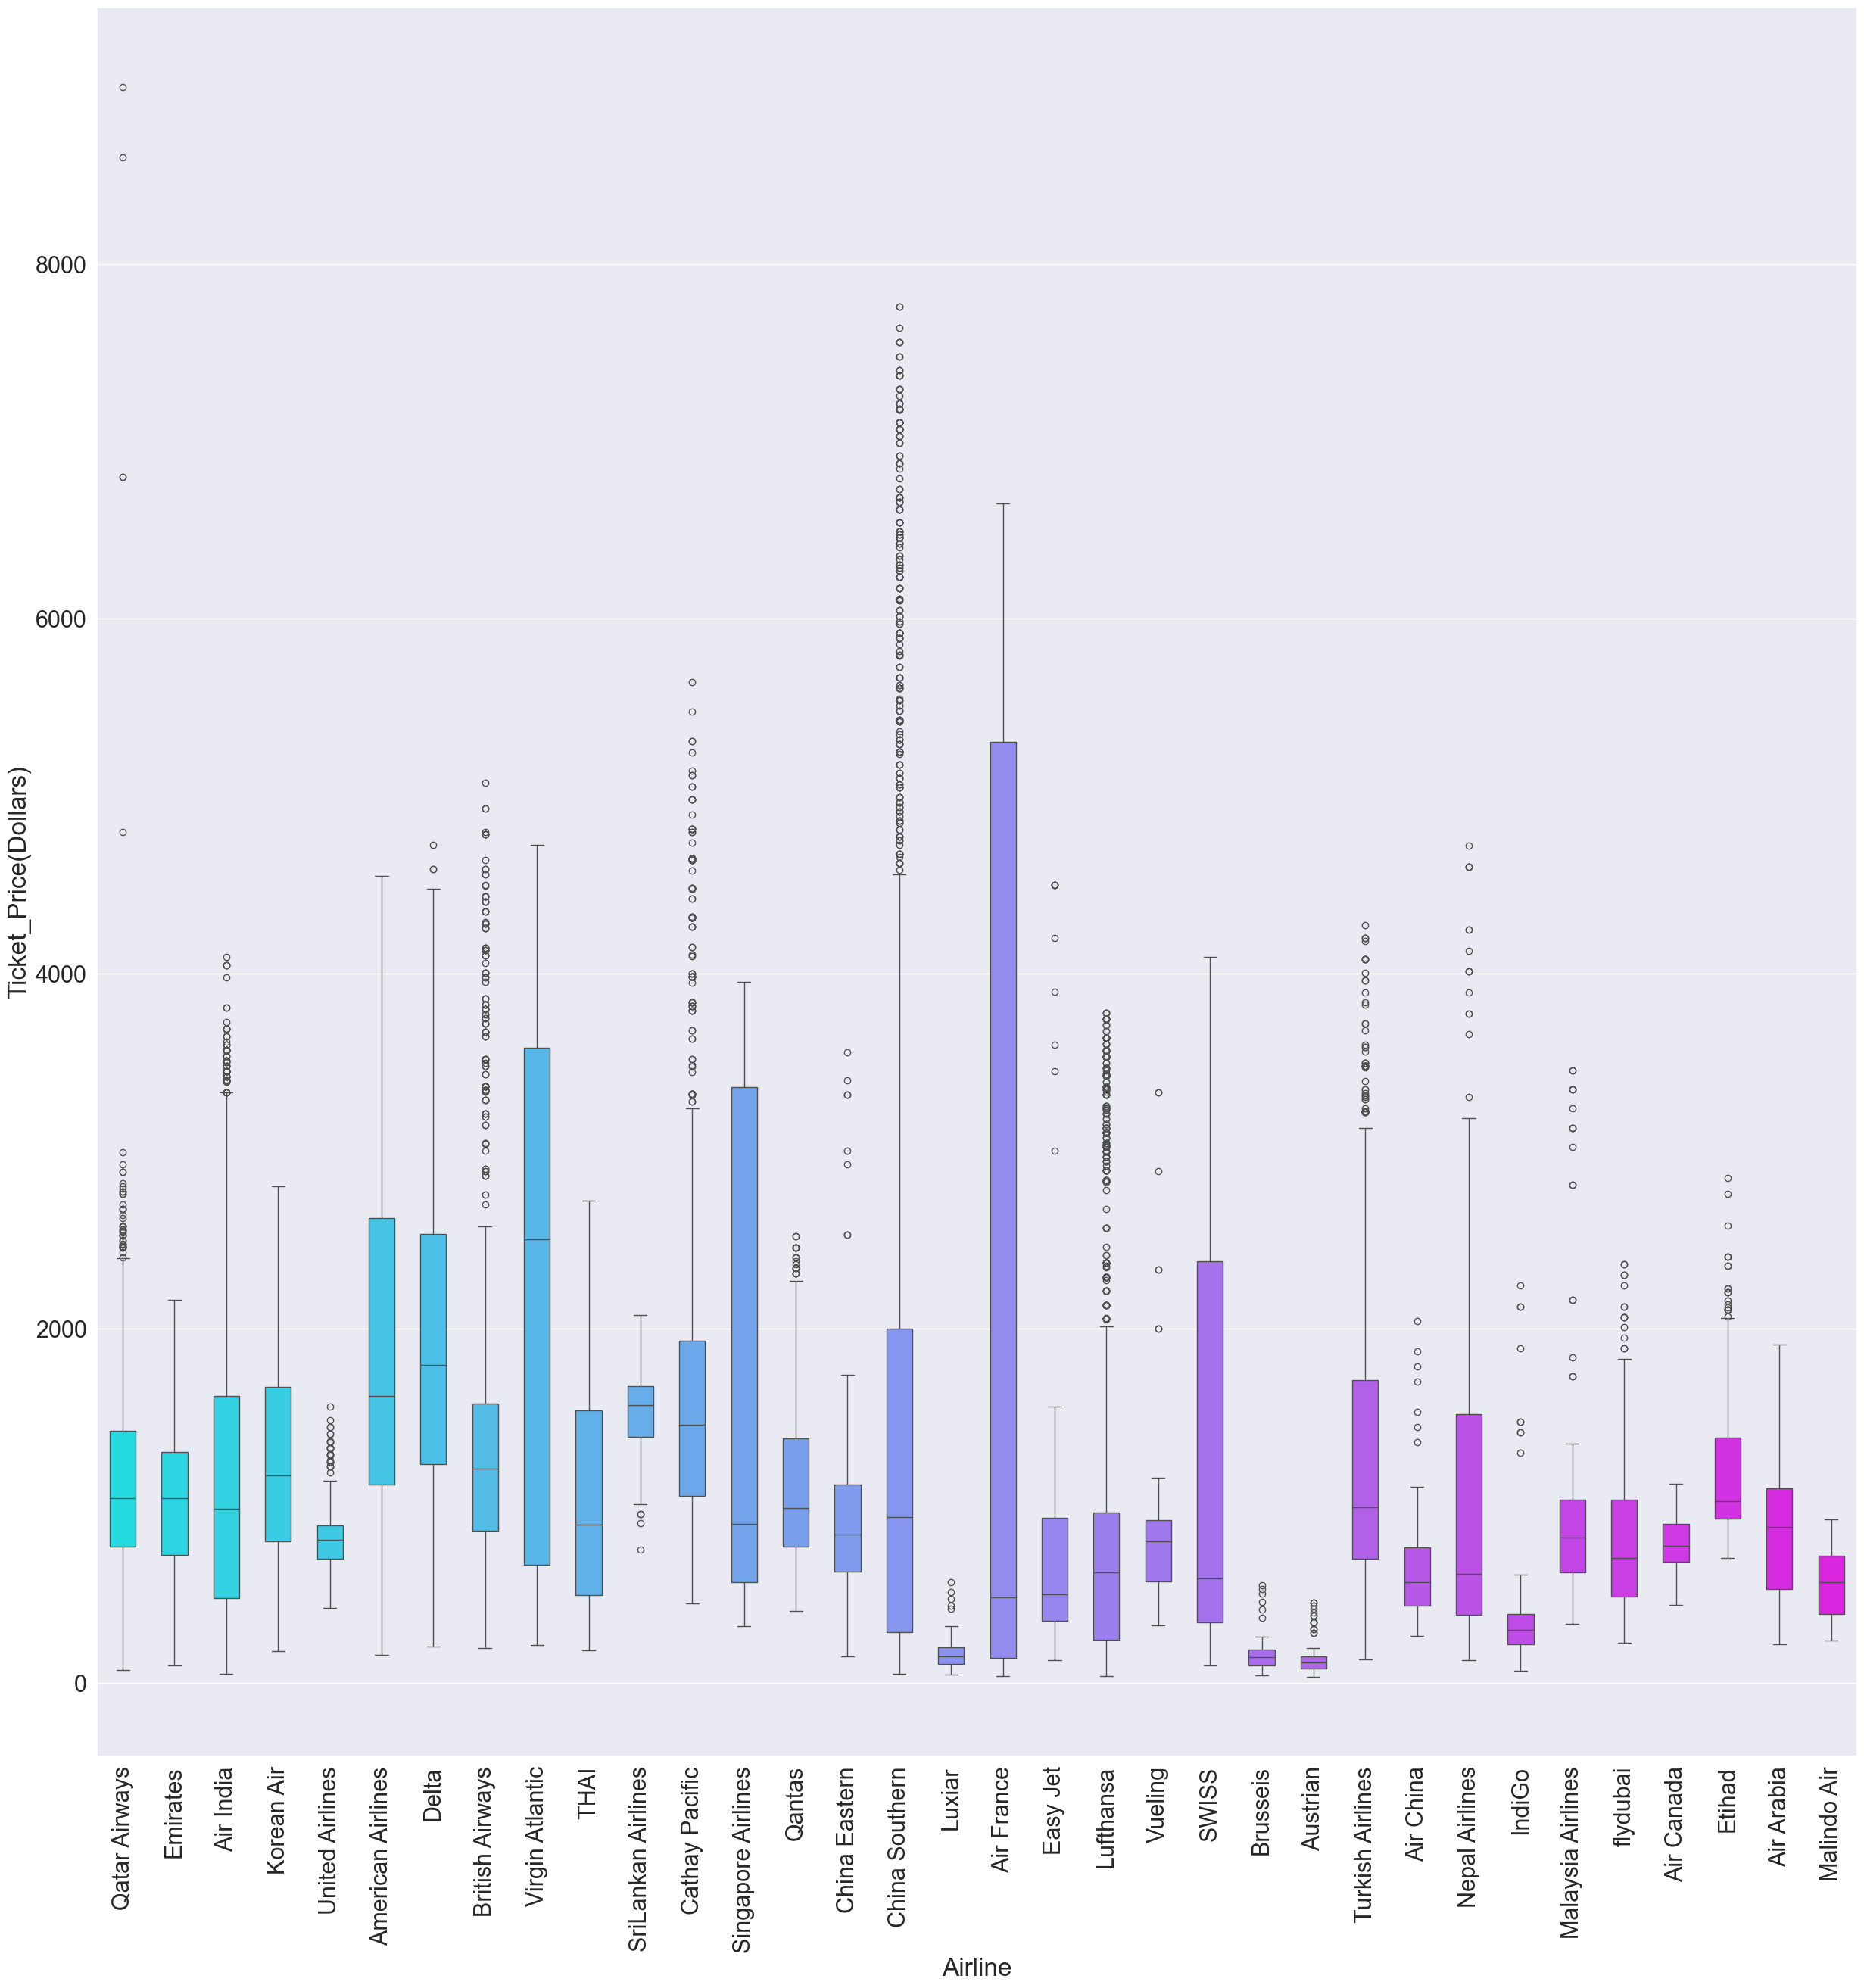

In [76]:

ax = plt.figure(figsize=(30,30))
sns.set(font_scale = 2)

ax = sns.boxplot(x="Airline",y="Ticket_Price(Dollars)", data=flights_flitered, width=0.5, dodge=False, palette='cool')

plt.xticks(rotation = 90)
plt.show()

In [18]:
flights_flitered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26496 entries, 0 to 26591
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                26496 non-null  object 
 1   Departure              26496 non-null  object 
 2   Destination            26496 non-null  object 
 3   Departure_date         26496 non-null  object 
 4   Arrival_date           26496 non-null  object 
 5   Ticket_Price(Dollars)  26496 non-null  float64
 6   Stops                  26496 non-null  int64  
 7   Travel_Time            26496 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 1.8+ MB


In [19]:
flights_flitered.head(10)

,Airline,Departure,Destination,Departure_date,Arrival_date,Ticket_Price(Dollars),Stops,Travel_Time
0,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1178.0,2,31
1,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-03,1218.0,2,42
2,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-04,667.0,2,23
3,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1064.0,1,28
4,Air India,Kathmandu,Chicago,2023-10-01,2023-10-02,1476.0,2,41
5,Korean Air,Kathmandu,Chicago,2023-10-01,2023-10-01,1368.0,1,36
6,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-02,638.0,1,22
7,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-02,841.0,2,29
8,Air India,Kathmandu,Chicago,2023-10-01,2023-10-03,1368.0,1,38
9,Korean Air,Kathmandu,Chicago,2023-10-01,2023-10-03,1064.0,3,28


In [20]:
# Converting Departure Date to date time object for Feature Engineering

flights_flitered['Departure_date'] = pd.to_datetime(flights_flitered['Departure_date'], format="%Y-%m-%d")
flights_flitered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26496 entries, 0 to 26591
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Airline                26496 non-null  object        
 1   Departure              26496 non-null  object        
 2   Destination            26496 non-null  object        
 3   Departure_date         26496 non-null  datetime64[ns]
 4   Arrival_date           26496 non-null  object        
 5   Ticket_Price(Dollars)  26496 non-null  float64       
 6   Stops                  26496 non-null  int64         
 7   Travel_Time            26496 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.8+ MB


In [21]:
def seasons(month):
    if 9<=month<=11:
        return "Autumn"
    else:
        return "Winter"

In [22]:
flights_flitered['Seasons'] = flights_flitered['Departure_date'].dt.month.apply(seasons)

print(flights_flitered)

                  Airline  Departure Destination Departure_date Arrival_date  \
0           Qatar Airways  Kathmandu     Chicago     2023-10-01   2023-10-01   
1                Emirates  Kathmandu     Chicago     2023-10-01   2023-10-03   
2                Emirates  Kathmandu     Chicago     2023-10-01   2023-10-04   
3           Qatar Airways  Kathmandu     Chicago     2023-10-01   2023-10-01   
4               Air India  Kathmandu     Chicago     2023-10-01   2023-10-02   
...                   ...        ...         ...            ...          ...   
26587              Etihad   New York   Singapore     2024-01-17   2024-01-18   
26588            Emirates   New York   Singapore     2024-01-17   2024-01-19   
26589          Korean Air   New York   Singapore     2024-01-17   2024-01-18   
26590     United Airlines   New York   Singapore     2024-01-17   2024-01-18   
26591  Singapore Airlines   New York   Singapore     2024-01-17   2024-01-19   

       Ticket_Price(Dollars)  Stops  Tr

In [23]:
Seasonal_Price =  flights_flitered.groupby('Seasons')['Ticket_Price(Dollars)'].mean()

print(Seasonal_Price)

Seasons
Autumn    1249.976417
Winter    1178.647074
Name: Ticket_Price(Dollars), dtype: float64


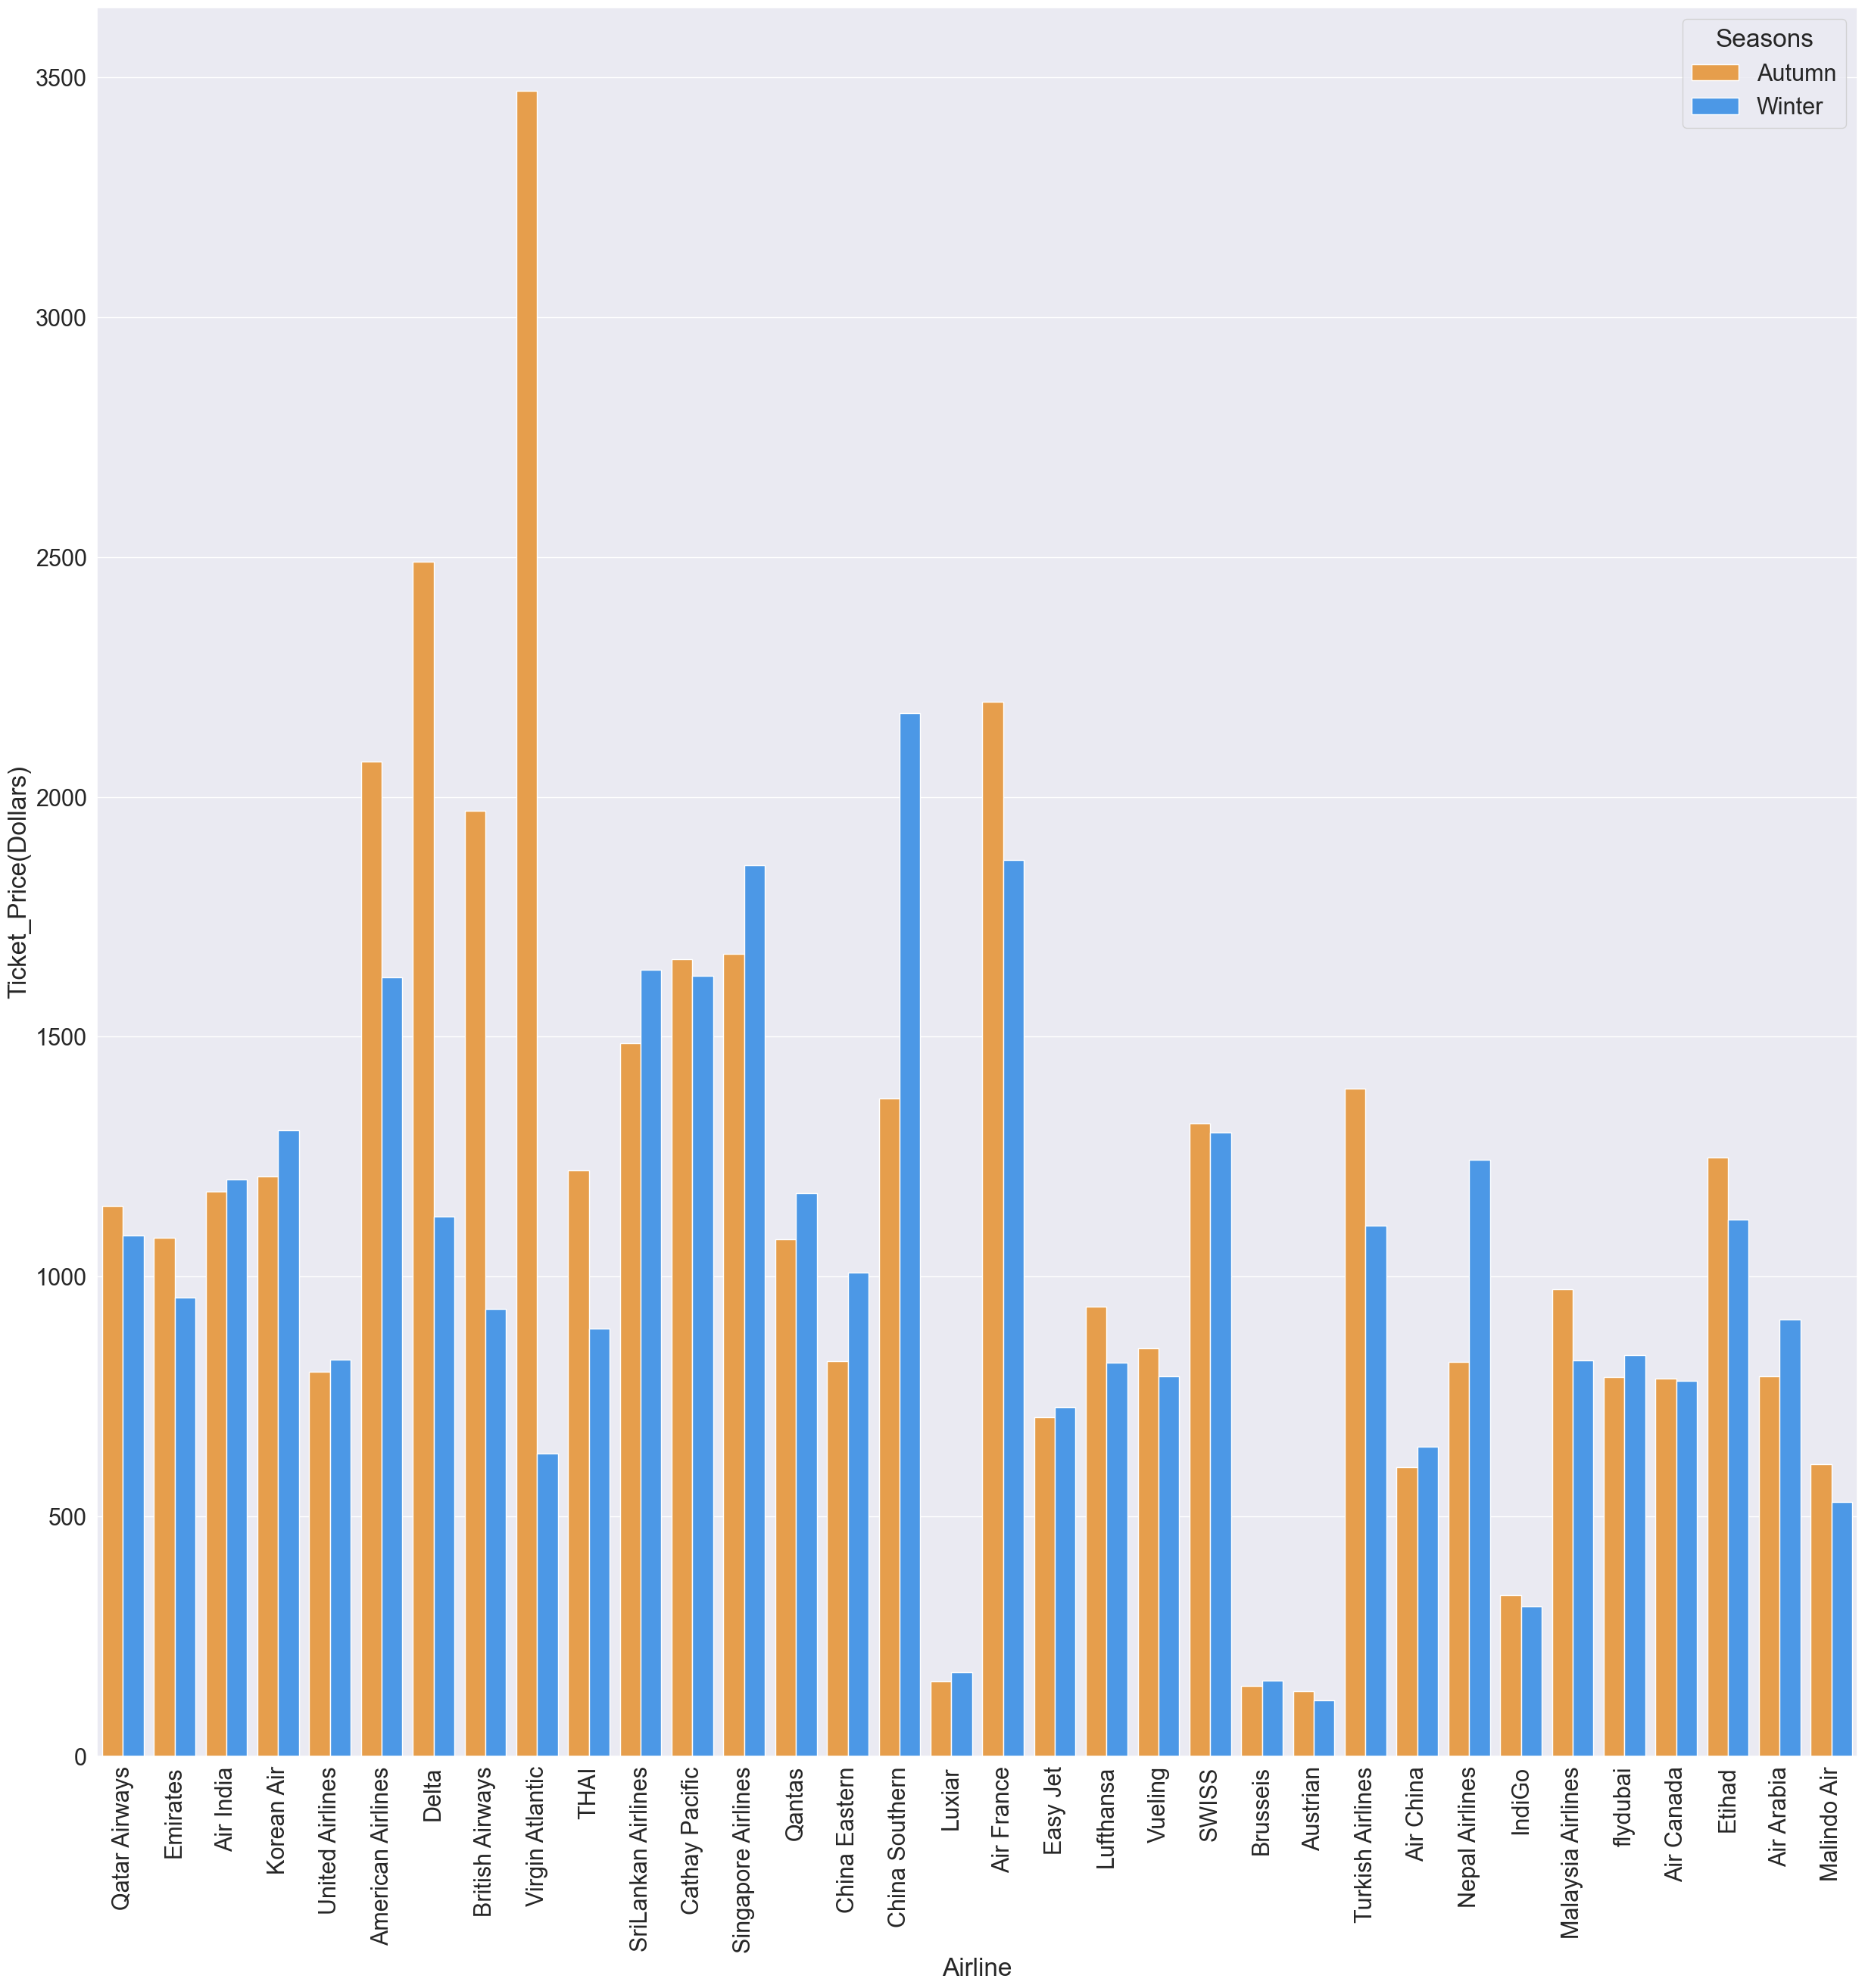

In [24]:
ax = plt.figure(figsize=(30,30))
sns.set(font_scale =2)

ax= sns.barplot(data=flights_flitered, x="Airline", y="Ticket_Price(Dollars)", hue="Seasons", errorbar=None, palette=["#FF9F33","#3398FF"])
plt.xticks(rotation=90)
plt.show()

<Figure size 5000x5000 with 0 Axes>

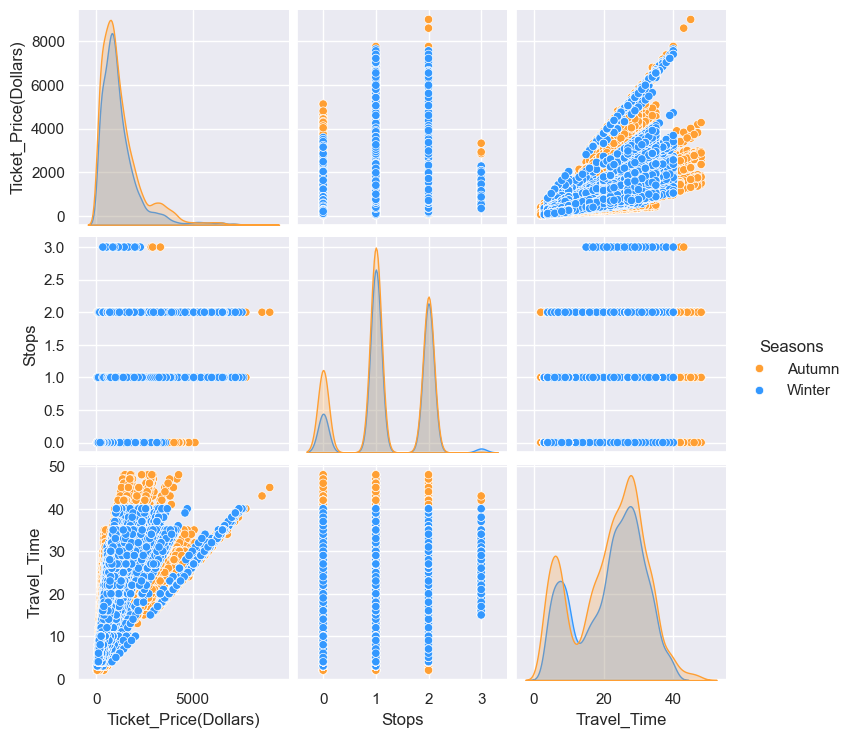

In [25]:

ax = plt.figure(figsize=(50,50))

sns.set(font_scale = 1)

ax = sns.pairplot(data=flights_flitered, hue='Seasons', palette=["#FF9F33","#3398FF"])


 
plt.show()

<Figure size 3000x3000 with 0 Axes>

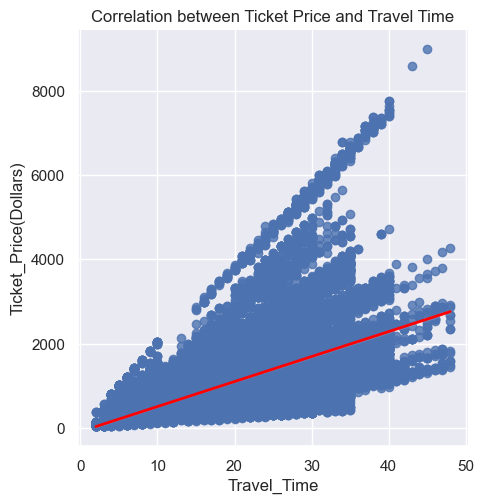

In [26]:

ax = plt.figure(figsize=(30,30))
sns.set(font_scale = 1)
ax = sns.lmplot(data=flights_flitered, y='Ticket_Price(Dollars)', x='Travel_Time', fit_reg=True, line_kws={"color": "red", "linewidth": 2})
plt.title("Correlation between Ticket Price and Travel Time")
plt.show()

The graph shows a positive correlation between ticket price and travel time. This means that, in general, tickets for longer flights are more expensive than tickets for shorter flights.

In [27]:
flights_2023 = flights_flitered.reset_index()
print(flights_2023)

       index             Airline  Departure Destination Departure_date  \
0          0       Qatar Airways  Kathmandu     Chicago     2023-10-01   
1          1            Emirates  Kathmandu     Chicago     2023-10-01   
2          2            Emirates  Kathmandu     Chicago     2023-10-01   
3          3       Qatar Airways  Kathmandu     Chicago     2023-10-01   
4          4           Air India  Kathmandu     Chicago     2023-10-01   
...      ...                 ...        ...         ...            ...   
26491  26587              Etihad   New York   Singapore     2024-01-17   
26492  26588            Emirates   New York   Singapore     2024-01-17   
26493  26589          Korean Air   New York   Singapore     2024-01-17   
26494  26590     United Airlines   New York   Singapore     2024-01-17   
26495  26591  Singapore Airlines   New York   Singapore     2024-01-17   

      Arrival_date  Ticket_Price(Dollars)  Stops  Travel_Time Seasons  
0       2023-10-01                 1178

In [28]:
flights_2023 = flights_2023.drop(columns=['index'])
flights_2023

,Airline,Departure,Destination,Departure_date,Arrival_date,Ticket_Price(Dollars),Stops,Travel_Time,Seasons
0,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1178.0,2,31,Autumn
1,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-03,1218.0,2,42,Autumn
2,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-04,667.0,2,23,Autumn
3,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1064.0,1,28,Autumn
4,Air India,Kathmandu,Chicago,2023-10-01,2023-10-02,1476.0,2,41,Autumn
...,...,...,...,...,...,...,...,...,...
26491,Etihad,New York,Singapore,2024-01-17,2024-01-18,990.0,1,33,Winter
26492,Emirates,New York,Singapore,2024-01-17,2024-01-19,1400.0,1,35,Winter
26493,Korean Air,New York,Singapore,2024-01-17,2024-01-18,1972.0,1,29,Winter
26494,United Airlines,New York,Singapore,2024-01-17,2024-01-18,700.0,2,28,Winter


In [29]:
flights_2023.head()

,Airline,Departure,Destination,Departure_date,Arrival_date,Ticket_Price(Dollars),Stops,Travel_Time,Seasons
0,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1178.0,2,31,Autumn
1,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-03,1218.0,2,42,Autumn
2,Emirates,Kathmandu,Chicago,2023-10-01,2023-10-04,667.0,2,23,Autumn
3,Qatar Airways,Kathmandu,Chicago,2023-10-01,2023-10-01,1064.0,1,28,Autumn
4,Air India,Kathmandu,Chicago,2023-10-01,2023-10-02,1476.0,2,41,Autumn


In [30]:
def assign_day_of_week(flights_2023):
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    
    for i in range(len(flights_2023)):
        try:    
            date = flights_2023.loc[i,'Departure_date']    
            day_of_week = datetime.strftime(date, '%A')
            flights_2023.loc[i, 'Day_of_the_week'] = day_of_week   

        except KeyError:
            pass
    
    return flights_2023

In [31]:
flights_2023_days = assign_day_of_week(flights_2023)

print(flights_2023_days)

C:\Users\dell\AppData\Local\Temp\ipykernel_8880\4189452931.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Sunday' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  flights_2023.loc[i, 'Day_of_the_week'] = day_of_week


                  Airline  Departure Destination Departure_date Arrival_date  \
0           Qatar Airways  Kathmandu     Chicago     2023-10-01   2023-10-01   
1                Emirates  Kathmandu     Chicago     2023-10-01   2023-10-03   
2                Emirates  Kathmandu     Chicago     2023-10-01   2023-10-04   
3           Qatar Airways  Kathmandu     Chicago     2023-10-01   2023-10-01   
4               Air India  Kathmandu     Chicago     2023-10-01   2023-10-02   
...                   ...        ...         ...            ...          ...   
26491              Etihad   New York   Singapore     2024-01-17   2024-01-18   
26492            Emirates   New York   Singapore     2024-01-17   2024-01-19   
26493          Korean Air   New York   Singapore     2024-01-17   2024-01-18   
26494     United Airlines   New York   Singapore     2024-01-17   2024-01-18   
26495  Singapore Airlines   New York   Singapore     2024-01-17   2024-01-19   

       Ticket_Price(Dollars)  Stops  Tr

In [32]:
# flights_2023_days.to_csv("Check.csv")

In [33]:
def is_weekend(flights_2023_days):
    
    
    for i in range(len(flights_2023_days)):
        # Get the day of the week
        day_of_week = flights_2023_days.loc[i, 'Day_of_the_week']
        
        # If the day of the week is Saturday or Sunday set the 'is_weekend value to True
        
        if day_of_week == 'Saturday' or day_of_week == 'Sunday':
            flights_2023_days.loc[i, 'is_weekend'] = True
            
        else:
             flights_2023_days.loc[i, 'is_weekend'] = False   
            
    return flights_2023_days            
                    
            

In [34]:
flights_2023_days_with_weekends = is_weekend(flights_2023_days)

C:\Users\dell\AppData\Local\Temp\ipykernel_8880\3086130351.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  flights_2023_days.loc[i, 'is_weekend'] = True


In [35]:
print(flights_2023_days_with_weekends)

                  Airline  Departure Destination Departure_date Arrival_date  \
0           Qatar Airways  Kathmandu     Chicago     2023-10-01   2023-10-01   
1                Emirates  Kathmandu     Chicago     2023-10-01   2023-10-03   
2                Emirates  Kathmandu     Chicago     2023-10-01   2023-10-04   
3           Qatar Airways  Kathmandu     Chicago     2023-10-01   2023-10-01   
4               Air India  Kathmandu     Chicago     2023-10-01   2023-10-02   
...                   ...        ...         ...            ...          ...   
26491              Etihad   New York   Singapore     2024-01-17   2024-01-18   
26492            Emirates   New York   Singapore     2024-01-17   2024-01-19   
26493          Korean Air   New York   Singapore     2024-01-17   2024-01-18   
26494     United Airlines   New York   Singapore     2024-01-17   2024-01-18   
26495  Singapore Airlines   New York   Singapore     2024-01-17   2024-01-19   

       Ticket_Price(Dollars)  Stops  Tr

In [36]:
flights_2023_days_with_weekends['is_weekend'].value_counts()

is_weekend
False    16420
True     10076
Name: count, dtype: int64

In [37]:
weekend_Prices = flights_2023_days_with_weekends.groupby('is_weekend')['Ticket_Price(Dollars)'].mean()
weekend_Prices

is_weekend
False    1261.147442
True     1147.466554
Name: Ticket_Price(Dollars), dtype: float64

In [38]:
flights_2023_days_with_weekends["Ticket_Price(Dollars)"].value_counts(normalize= True) 



Ticket_Price(Dollars)
840.0     0.006190
600.0     0.004604
900.0     0.004529
990.0     0.004416
810.0     0.004189
            ...   
627.0     0.000038
4100.0    0.000038
2865.0    0.000038
927.0     0.000038
2034.0    0.000038
Name: proportion, Length: 1715, dtype: float64

In [39]:
def assign_class(flights):
    
    for i in range(len(flights)):
        price = flights.loc[i, "Ticket_Price(Dollars)"]
        
        if price < 501:
           flights.loc[i, "Flight_Class"] = "Economy"
        
        elif price < 1001:
            flights.loc[i, "Flight_Class"] = "Business"
        
        else:
            flights.loc[i, "Flight_Class"] = "First"    
    
    return flights           
            

In [40]:
flights_with_class = assign_class(flights_2023_days_with_weekends)

print(flights_with_class)

C:\Users\dell\AppData\Local\Temp\ipykernel_8880\4047711700.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'First' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  flights.loc[i, "Flight_Class"] = "First"


                  Airline  Departure Destination Departure_date Arrival_date  \
0           Qatar Airways  Kathmandu     Chicago     2023-10-01   2023-10-01   
1                Emirates  Kathmandu     Chicago     2023-10-01   2023-10-03   
2                Emirates  Kathmandu     Chicago     2023-10-01   2023-10-04   
3           Qatar Airways  Kathmandu     Chicago     2023-10-01   2023-10-01   
4               Air India  Kathmandu     Chicago     2023-10-01   2023-10-02   
...                   ...        ...         ...            ...          ...   
26491              Etihad   New York   Singapore     2024-01-17   2024-01-18   
26492            Emirates   New York   Singapore     2024-01-17   2024-01-19   
26493          Korean Air   New York   Singapore     2024-01-17   2024-01-18   
26494     United Airlines   New York   Singapore     2024-01-17   2024-01-18   
26495  Singapore Airlines   New York   Singapore     2024-01-17   2024-01-19   

       Ticket_Price(Dollars)  Stops  Tr

In [41]:
# flights_with_class.to_csv("Modified_Flight_Data.csv")

In [42]:
flights_with_class["Flight_Class"].value_counts()

Flight_Class
First       12124
Business     8397
Economy      5975
Name: count, dtype: int64

In [43]:
flights_with_class["Flight_Class"].value_counts(normalize=True) * 100

Flight_Class
First       45.757850
Business    31.691576
Economy     22.550574
Name: proportion, dtype: float64

We can see that First class has a proportion of 45.75 percent, Business class has a proportion of 31.69 percent and Economy class has a proportion of 22.55 percent. If we develop a machine learning model just on the data set according the data proportion percentages then the flight class with the lowest proportion will have a hard time being predicted.

In [44]:
flights_with_class.columns

Index(['Airline', 'Departure', 'Destination', 'Departure_date', 'Arrival_date',
       'Ticket_Price(Dollars)', 'Stops', 'Travel_Time', 'Seasons',
       'Day_of_the_week', 'is_weekend', 'Flight_Class'],
      dtype='object')

Here we take variable x as independent and y as dependent 